# MNIST

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import matplotlib.pyplot as plt

## Global config

In [2]:
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import GridSearchCV
import timeit

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Load data

In [3]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [4]:
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=10, kernel="poly", random_state=42),
    "LogisticRegression": LogisticRegression(C=10, penalty="none", random_state=42)
}


n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))

model_parameters = {
    "GaussianNB": {
    
    },
    "DecisionTree": {
        'random_state': [42],
        'min_samples_leaf': [0, 2, 5, 7, 10],
        'max_depth': [None, 2, 5, 7, 10]
    },
    "KNeighbors": {
        'n_neighbors': range(1,10),
        'weights': ["uniform", "distance"]
    },
    "SVM": {
        'C': [0.1, 0.3, 0.5, 1, 5, 10],
        'kernel': ["poly", "rbf", "sigmoid"],
        'degree': range(1,4),
        'random_state': [42]
    },
    "LogisticRegression": {
        'C': [0.1, 0.3, 0.5, 1, 5, 10],  
        'solver': ["saga", "sag", "lbfgs"],
        'random_state': [42]
    }
}

##  Data exploration

### Question 1
Hint: `plt.imshow`

1 :


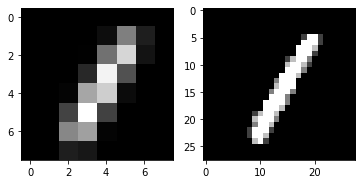

7 :


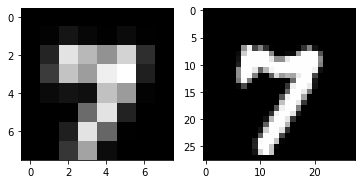

0 :


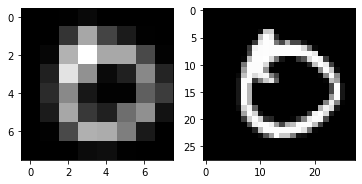

5 :


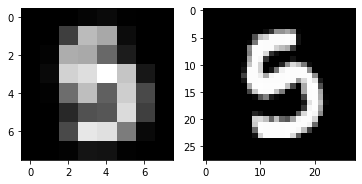

2 :


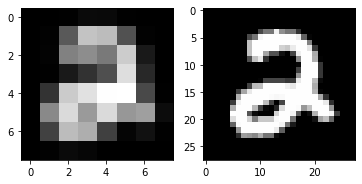

8 :


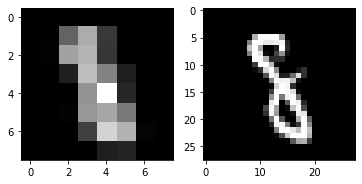

4 :


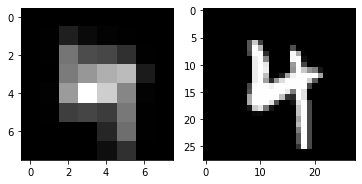

0 :


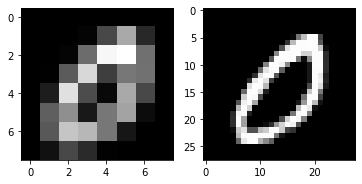

4 :


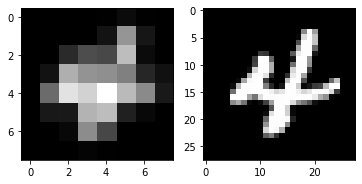

2 :


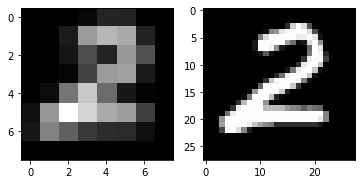

In [5]:
for i in range(0,10):
    print(train_labels[i], ":")
    
    plt.subplot(1, 2, 1)
    plt.imshow(mnist_8x8_train[i], cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(mnist_28x28_train[i], cmap='gray')
    plt.show()

plt.close()

##  Data Preparations

### Question 1

1 :
Mean:
 8-Bit Image:  22.8125
 28-Bit Image 22.772959183673468
Standard Deviation:
 8-Bit Image:  47.09527411269627
 28-Bit Image 68.75813112152528


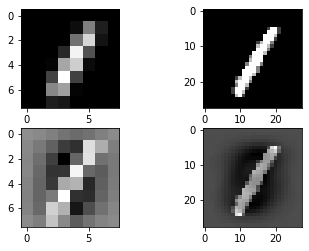

7 :
Mean:
 8-Bit Image:  38.734375
 28-Bit Image 38.44642857142857
Standard Deviation:
 8-Bit Image:  61.71386649983434
 28-Bit Image 84.86772232932464


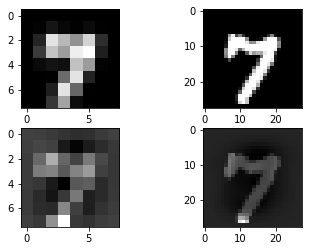

0 :
Mean:
 8-Bit Image:  40.453125
 28-Bit Image 40.235969387755105
Standard Deviation:
 8-Bit Image:  53.36487892551032
 28-Bit Image 83.9638629878104


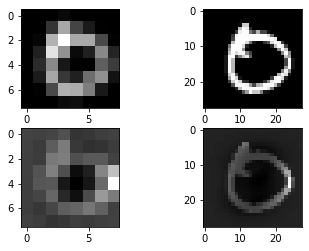

5 :
Mean:
 8-Bit Image:  45.078125
 28-Bit Image 44.99872448979592
Standard Deviation:
 8-Bit Image:  62.66261462374815
 28-Bit Image 89.63298891844849


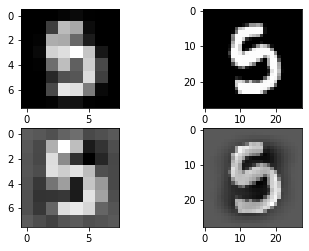

2 :
Mean:
 8-Bit Image:  57.5625
 28-Bit Image 57.46811224489796
Standard Deviation:
 8-Bit Image:  72.03078226529266
 28-Bit Image 98.21828045646153


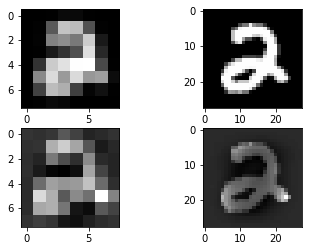

8 :
Mean:
 8-Bit Image:  26.21875
 28-Bit Image 26.154336734693878
Standard Deviation:
 8-Bit Image:  45.08411192912089
 28-Bit Image 69.53745068320569


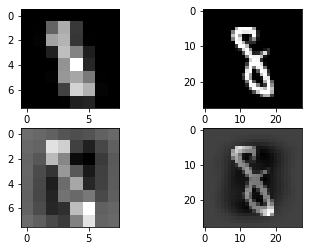

4 :
Mean:
 8-Bit Image:  30.734375
 28-Bit Image 30.677295918367346
Standard Deviation:
 8-Bit Image:  52.257846954877266
 28-Bit Image 76.09444115256117


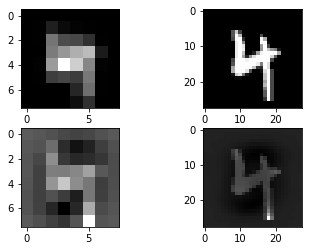

0 :
Mean:
 8-Bit Image:  38.546875
 28-Bit Image 38.36862244897959
Standard Deviation:
 8-Bit Image:  51.69802029801891
 28-Bit Image 82.75189180364366


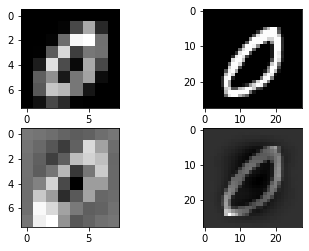

4 :
Mean:
 8-Bit Image:  39.28125
 28-Bit Image 39.24872448979592
Standard Deviation:
 8-Bit Image:  58.62179328916422
 28-Bit Image 84.53322087822363


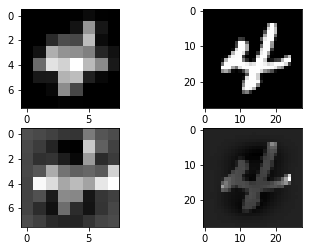

2 :
Mean:
 8-Bit Image:  46.9375
 28-Bit Image 46.735969387755105
Standard Deviation:
 8-Bit Image:  61.774508041343395
 28-Bit Image 90.8447764050344


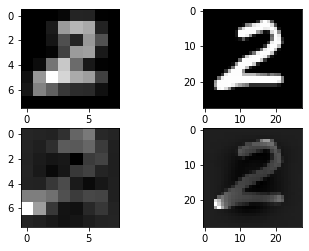

In [6]:
n_samples8x8 = len(mnist_8x8_train)
features_8x8 = mnist_8x8_train.reshape((n_samples8x8, -1))
processed_8x8 = preprocessing.scale(features_8x8)

processed_image_8x8 = processed_8x8.reshape((n_samples8x8, 8, 8))

n_samples28x28 = len(mnist_28x28_train)
features_28x28 = mnist_28x28_train.reshape((n_samples28x28, -1))
processed_28x28 = preprocessing.scale(features_28x28)

processed_image_28x28 = processed_28x28.reshape((n_samples28x28, 28, 28))

plt.figure()

for i in range(0,10):

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    print(train_labels[i], ":")
    
    print("Mean:\n", "8-Bit Image: ", mnist_8x8_train[i].mean())
    print(" 28-Bit Image", mnist_28x28_train[i].mean())
    print("Standard Deviation:\n", "8-Bit Image: ", mnist_8x8_train[i].std())
    print(" 28-Bit Image", mnist_28x28_train[i].std())
        
    ax1.imshow(mnist_8x8_train[i], cmap='gray')
    
    ax2.imshow(mnist_28x28_train[i], cmap='gray')
    
    ax3.imshow(processed_image_8x8[i], cmap='gray')
    
    ax4.imshow(processed_image_28x28[i], cmap='gray')
    
    plt.show()

plt.close()

## Experiments

### Question 1

In [7]:
def runmodel(features, labels):    
    for name, model in models.items():
        print(name)

        model.fit(features, labels)
        
        check_is_fitted(model)

        prediction = model.predict(features)
        f1_score_value = f1_score(labels, prediction, average="weighted")
        accuracy = accuracy_score(labels, prediction)
        print("- accuracy_score", accuracy)
        print("- f1_score", f1_score_value)
        print()

X = processed_8x8
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
    
    return scores["test_score"]

### Question 2

Test/validation split:

*  GaussianNB
  - accuracy_score 0.5312
  - f1_score 0.5084341244620314
*  DecisionTree
  - accuracy_score 0.916
  - f1_score 0.9155675192333596
*  KNeighbors
  - accuracy_score 0.9752
  - f1_score 0.9751932710157403
*  SVM
  - accuracy_score 0.9706666666666667
  - f1_score 0.9708829087956687
*  LogisticRegression
  - accuracy_score 0.9306666666666666
  - f1_score 0.9305758299558672

K-fold validation:
*  GaussianNB
  - mean_F1 0.5103850239128499
  - std_F1 0.030999893271823824
  - accuracy_mean 0.5418666666666667
  - accuracy_std 0.022948831972213507
*  DecisionTree
  - mean_F1 0.7632329149943082
  - std_F1 0.02246734583711508
  - accuracy_mean 0.7653333333333334
  - accuracy_std 0.02226307356239127
*  KNeighbors
  - mean_F1 0.8839665996786559
  - std_F1 0.01020764902736227
  - accuracy_mean 0.8837333333333334
  - accuracy_std 0.010444349881368607
*  SVM
  - mean_F1 0.9205532954268545
  - std_F1 0.008860327114503299
  - accuracy_mean 0.9202666666666668
  - accu

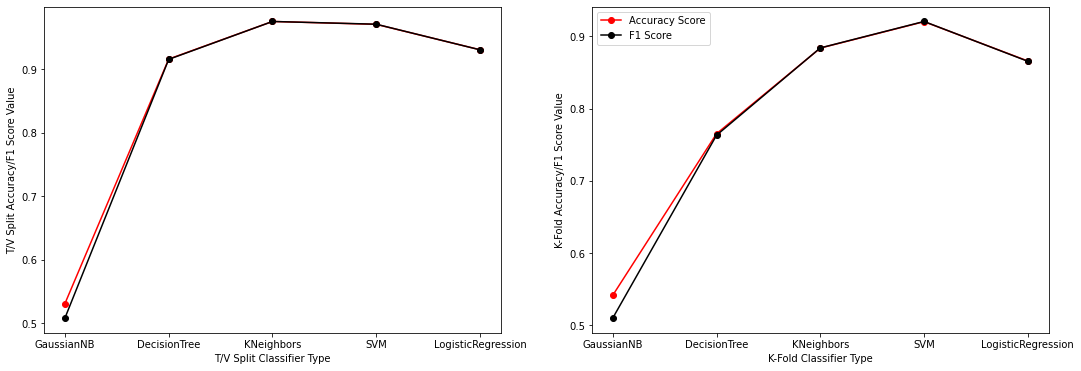

In [8]:


fig= plt.figure(figsize=(18,6))

tv = plt.subplot(1,2,1)
kf = plt.subplot(1,2,2)

tv.set_xlabel("T/V Split Classifier Type")
tv.set_ylabel("T/V Split Accuracy/F1 Score Value")
    
kf.set_xlabel("K-Fold Classifier Type")
kf.set_ylabel("K-Fold Accuracy/F1 Score Value")

def runvalidation():
    scoring_method_f1 = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))
    scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(true_target, prediction))

    names = [];

    for name, model in models.items():
        names.append(name)
    
    print("Test/validation split:")
    
    for name, model in models.items():
        model.fit(X_train,y_train)

    print()

    for model in models.values():
        check_is_fitted(model)

    fvals = []
    avals = []

    for name, model in models.items():
        prediction = model.predict(X)
        f1_score_value = f1_score(y, prediction, average="weighted")
        accuracy = accuracy_score(y, prediction)
        print("* ", name)
        print("  - accuracy_score", accuracy)
        print("  - f1_score", f1_score_value)
        
        # tv.bar(name, accuracy, label=name)
        avals.append(accuracy)
        fvals.append(f1_score_value)
        
    tv.plot(names, avals, label="Accuracy Score", color="red", marker='o')
    tv.plot(names, fvals, label="F1 Score", color="black", marker='o')
        
        
    print()
    print("K-fold validation:")

    n_splits = 5

    fvals = []
    avals = []

    for name, model in models.items():
        print("* ", name)
        metrics_f1 = k_fold_fit_and_evaluate(processed_8x8, train_labels, model, scoring_method_f1, n_splits=n_splits)
        metrics_accuracy = k_fold_fit_and_evaluate(X,y, model, scoring_method_accuracy, n_splits=n_splits)

        print("  - mean_F1", np.mean(metrics_f1))
        print("  - std_F1", np.std(metrics_f1))
        print("  - accuracy_mean", np.mean(metrics_accuracy))
        print("  - accuracy_std", np.std(metrics_accuracy))

        avals.append(np.mean(metrics_accuracy))
        fvals.append(np.mean(metrics_f1))

    kf.plot(names, avals, label="Accuracy Score", color="red", marker='o')
    kf.plot(names, fvals, label="F1 Score", color="black", marker='o')
        
    plt.legend()
    plt.show()
    
    
runvalidation()

plt.close()

### Question 3

GaussianNB
- best_score = 0.5103850239128499
best paramters:
DecisionTree
- best_score = 0.7632329149943082
best paramters:
- max_depth None
- min_samples_leaf 2
- random_state 42
KNeighbors
- best_score = 0.8902134818456598
best paramters:
- n_neighbors 4
- weights distance
SVM
- best_score = 0.9326776853178733
best paramters:
- C 5
- degree 1
- kernel rbf
- random_state 42
LogisticRegression
- best_score = 0.8909200043351972
best paramters:
- C 0.1
- random_state 42
- solver sag


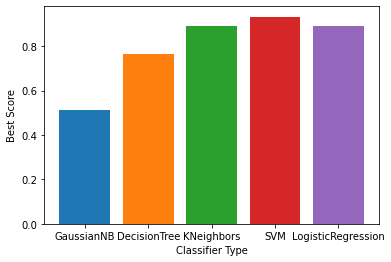

In [9]:
plt.xlabel("Classifier Type")
plt.ylabel("Best Score")

optimized_hyper_params  = []

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(processed_8x8, train_labels)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    optimized_hyper_params.append(grid_search.best_params_)
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)
        
    plt.bar(model_name, best_score, label=model_name)
plt.show()
        

### Question 4 

In [10]:
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=4, weights="distance"),
    "SVM": SVC(C=5, kernel="rbf", random_state=42),
    "LogisticRegression": LogisticRegression(C=0.1, solver="sag", penalty="none", random_state=42)
}

Test/validation split:

*  GaussianNB
  - accuracy_score 0.5312
  - f1_score 0.5084341244620314
*  DecisionTree
  - accuracy_score 0.916
  - f1_score 0.9155675192333596
*  KNeighbors
  - accuracy_score 0.9741333333333333
  - f1_score 0.974148432594102
*  SVM
  - accuracy_score 0.9789333333333333
  - f1_score 0.9789355243562563
*  LogisticRegression
  - accuracy_score 0.912
  - f1_score 0.9117623503643599

K-fold validation:
*  GaussianNB
  - mean_F1 0.5103850239128499
  - std_F1 0.030999893271823824
  - accuracy_mean 0.5418666666666667
  - accuracy_std 0.022948831972213507
*  DecisionTree
  - mean_F1 0.7632329149943082
  - std_F1 0.02246734583711508
  - accuracy_mean 0.7653333333333334
  - accuracy_std 0.02226307356239127
*  KNeighbors
  - mean_F1 0.8902134818456598
  - std_F1 0.013553785451894307
  - accuracy_mean 0.8901333333333333
  - accuracy_std 0.013897401835515041
*  SVM
  - mean_F1 0.9326776853178733
  - std_F1 0.010160442091050815
  - accuracy_mean 0.9328
  - accuracy_std 0.01

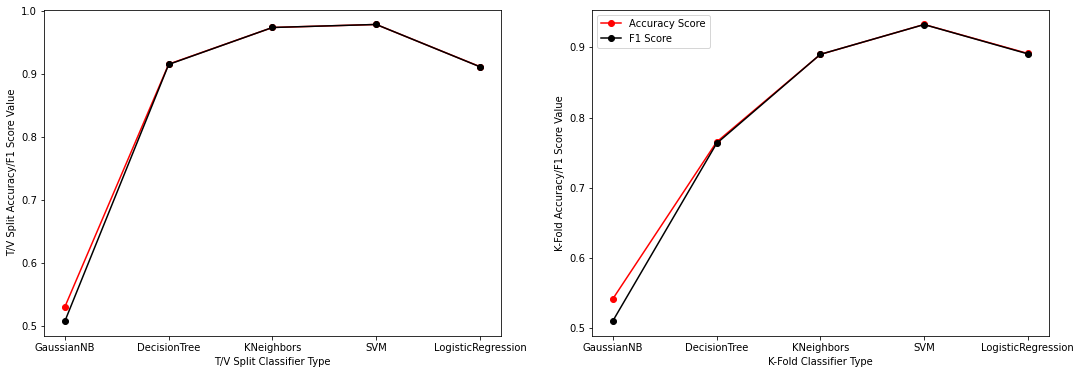

In [11]:
fig= plt.figure(figsize=(18,6))

tv = plt.subplot(1,2,1)
kf = plt.subplot(1,2,2)

tv.set_xlabel("T/V Split Classifier Type")
tv.set_ylabel("T/V Split Accuracy/F1 Score Value")
    
kf.set_xlabel("K-Fold Classifier Type")
kf.set_ylabel("K-Fold Accuracy/F1 Score Value")


runvalidation()

plt.close()

### Question 5

In [12]:
def run8x8():
    runmodel(processed_8x8, train_labels)

def run28x28():
    runmodel(processed_28x28, train_labels)

print("8 Bit Image Processing:", "\n")
print("Time it takes to fit the model:", timeit.timeit(run8x8, number=1), "seconds")

print("\n28 Bit Image Processing:", "\n")
print("Time it takes to fit the model:", timeit.timeit(run28x28, number=1), "seconds")

8 Bit Image Processing: 

GaussianNB
- accuracy_score 0.5408
- f1_score 0.515491940655775

DecisionTree
- accuracy_score 0.956
- f1_score 0.9558714940526664

KNeighbors
- accuracy_score 1.0
- f1_score 1.0

SVM
- accuracy_score 0.9922666666666666
- f1_score 0.9922674792637826

LogisticRegression
- accuracy_score 0.9224
- f1_score 0.922277888496787

Time it takes to fit the model: 3.2149493000000007 seconds

28 Bit Image Processing: 

GaussianNB
- accuracy_score 0.5768
- f1_score 0.5326736405874763

DecisionTree
- accuracy_score 0.9573333333333334
- f1_score 0.9573149447557756

KNeighbors
- accuracy_score 1.0
- f1_score 1.0

SVM
- accuracy_score 0.9994666666666666
- f1_score 0.9994670195637535

LogisticRegression
- accuracy_score 0.9682666666666667
- f1_score 0.9682074584202714

Time it takes to fit the model: 40.53777049999999 seconds


### Question 6

In [13]:
# runmodel(processed_8x8, train_labels)

n_samples_test_8x8 = len(mnist_8x8_test)
features_test_8x8 = mnist_8x8_test.reshape((n_samples_test_8x8, -1))
processed_test_8x8 = preprocessing.scale(features_test_8x8)

prediction = SVC(C=5, kernel="rbf", random_state=42).fit(processed_8x8, train_labels).predict(processed_test_8x8)

# prediction = np.array([-1] * len(mnist_8x8_test)) #TODO replace this with you own prediction

pd.DataFrame(prediction).to_csv("170_classes_problem_mnist.txt", index=False, header=False)